In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, classification_report

from tensorflow.keras.metrics import Precision, Recall, AUC, CategoricalAccuracy
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical


%matplotlib inline

In [4]:
df = pd.read_csv('../dataset/sms-labeled-3k-clean.csv')
df

,label,message
0,0,festival selamat anda dapatkan hadiah cek tuna...
1,0,surat keputusan dari shopee slamat anda dapatk...
2,0,info pemenang slamat anda pilih dapatkan cek d...
3,0,and terpilih mndptkn program thunan rejeki pee...
4,1,oktober untung kartu super bagus dan jackpot f...
...,...,...
2736,2,solusi keuangan agunan bpkb mobil tenor thn st...
2737,0,selamat nomor anda men dpt hadiah cek tunai wh...
2738,0,pesan resmi anda dapatkan hadiah juta dri mkio...
2739,0,shopee grandprize selamat anda adalah pemenang...


In [5]:
# dataset shape
df.shape

(2741, 2)

In [6]:
# one-hot the labels
labels = df['label'].values
labels = to_categorical(labels)
labels

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [7]:
# message
messages = df['message'].values
messages

array(['festival selamat anda dapatkan hadiah cek tunai pin info klik program hadiah',
       'surat keputusan dari shopee slamat anda dapatkan cek tunai pin pemenang info klik bit undiansho pee',
       'info pemenang slamat anda pilih dapatkan cek dri pee pin info hadiah klik https shopee',
       ...,
       'pesan resmi anda dapatkan hadiah juta dri mkios pin info klik www hadiah mkios blogspot com',
       'shopee grandprize selamat anda adalah pemenang jutawan shopee juta dengan aaq info klik www infoshopee miliar blogspot com',
       'promo hadiah whatsapp selamat whatsapp anda meraih hadiah pemenang pin adtr cek hadiah anda www hadiahwhatsap blogspot com'],
      dtype=object)

In [8]:
MAXLEN = 50 # max words per message
MAX_WORDS = 10000 # max number of words to have in vocabulary

In [9]:
# create tokenizer
def tokenize_texts(texts, max_words):
    tokenizer = Tokenizer(num_words=max_words)
    tokenizer.fit_on_texts(texts)
    tokens = tokenizer.texts_to_sequences(texts)
    word_index = tokenizer.word_index
    return tokens, word_index

tokens, word_index = tokenize_texts(messages, MAX_WORDS)

# convert tokens into fixed length tensor (dataset for training)
data = pad_sequences(tokens, maxlen=MAXLEN)
data.shape

(2741, 50)

In [10]:
data[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0, 2296,   14,    1,   74,    5,    9,
         37,    6,    2,    3,   80,    5], dtype=int32)

In [11]:
word_index['anda']

1

In [12]:
# Shuffles data
indices = np.arange(data.shape[0])
np.random.shuffle(indices)

labels = labels[indices]
data = data[indices]

In [13]:
# split data and labels for training and test
# training: the first 2000 data
x_train = data[:2000]
y_train = labels[:2000]

# test: the rest of the data
x_test = data[2000:]
y_test = labels[2000:]

In [14]:
# create model
def get_model():
    model = models.Sequential([
        layers.Embedding(MAX_WORDS, 8, input_length=MAXLEN), # 8 embedding dimension
        layers.Flatten(),
        layers.Dense(4, activation='softmax') # 4 probability output
    ])
    metrics = [
        CategoricalAccuracy(),
        Precision(),
        Recall(),
        AUC(),
    ]
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=metrics)
    return model

In [15]:
# Train the model
EPOCHS = 75

model = get_model()
hist = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=512, validation_split=0.2)

Epoch 1/75
4/4 [==============================] - 0s 86ms/step - loss: 1.3736 - categorical_accuracy: 0.3306 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.6173 - val_loss: 1.3240 - val_categorical_accuracy: 0.5850 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8034
Epoch 2/75
4/4 [==============================] - 0s 7ms/step - loss: 1.3056 - categorical_accuracy: 0.5731 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.8132 - val_loss: 1.2604 - val_categorical_accuracy: 0.5775 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8278
Epoch 3/75
4/4 [==============================] - 0s 8ms/step - loss: 1.2462 - categorical_accuracy: 0.5337 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.8311 - val_loss: 1.2059 - val_categorical_accuracy: 0.5750 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.8404
Epoch 4/75
4/4 [==============================] - 0s 7ms/step - loss: 1.1951 - categorical_accuracy: 0.5331 - precision: 0.

4/4 [==============================] - 0s 7ms/step - loss: 0.5112 - categorical_accuracy: 0.9000 - precision: 0.9909 - recall: 0.7481 - auc: 0.9781 - val_loss: 0.5756 - val_categorical_accuracy: 0.8725 - val_precision: 0.9684 - val_recall: 0.6900 - val_auc: 0.9614
Epoch 31/75
4/4 [==============================] - 0s 7ms/step - loss: 0.4911 - categorical_accuracy: 0.9069 - precision: 0.9911 - recall: 0.7688 - auc: 0.9798 - val_loss: 0.5615 - val_categorical_accuracy: 0.8775 - val_precision: 0.9721 - val_recall: 0.6975 - val_auc: 0.9652
Epoch 32/75
4/4 [==============================] - 0s 7ms/step - loss: 0.4724 - categorical_accuracy: 0.9144 - precision: 0.9914 - recall: 0.7906 - auc: 0.9836 - val_loss: 0.5459 - val_categorical_accuracy: 0.8750 - val_precision: 0.9727 - val_recall: 0.7125 - val_auc: 0.9666
Epoch 33/75
4/4 [==============================] - 0s 7ms/step - loss: 0.4531 - categorical_accuracy: 0.9162 - precision: 0.9923 - recall: 0.8044 - auc: 0.9851 - val_loss: 0.5296 - 

Epoch 60/75
4/4 [==============================] - 0s 7ms/step - loss: 0.1369 - categorical_accuracy: 0.9862 - precision: 0.9942 - recall: 0.9619 - auc: 0.9992 - val_loss: 0.2844 - val_categorical_accuracy: 0.9175 - val_precision: 0.9620 - val_recall: 0.8850 - val_auc: 0.9889
Epoch 61/75
4/4 [==============================] - 0s 7ms/step - loss: 0.1306 - categorical_accuracy: 0.9862 - precision: 0.9942 - recall: 0.9644 - auc: 0.9993 - val_loss: 0.2794 - val_categorical_accuracy: 0.9175 - val_precision: 0.9621 - val_recall: 0.8875 - val_auc: 0.9889
Epoch 62/75
4/4 [==============================] - 0s 7ms/step - loss: 0.1246 - categorical_accuracy: 0.9875 - precision: 0.9942 - recall: 0.9675 - auc: 0.9993 - val_loss: 0.2759 - val_categorical_accuracy: 0.9175 - val_precision: 0.9621 - val_recall: 0.8875 - val_auc: 0.9890
Epoch 63/75
4/4 [==============================] - 0s 7ms/step - loss: 0.1193 - categorical_accuracy: 0.9862 - precision: 0.9942 - recall: 0.9675 - auc: 0.9993 - val_los

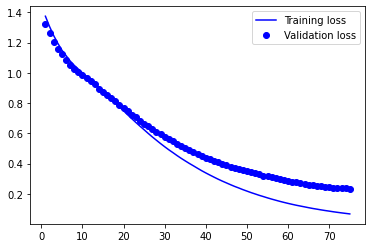

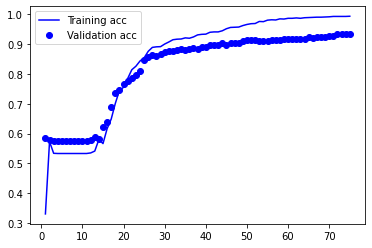

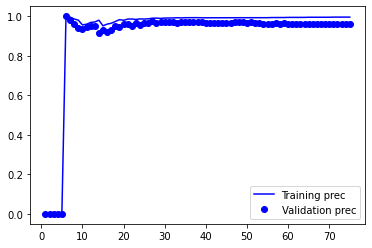

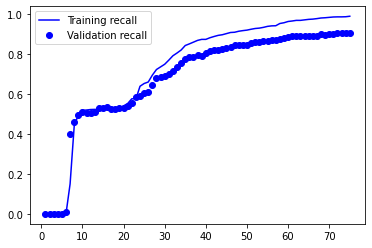

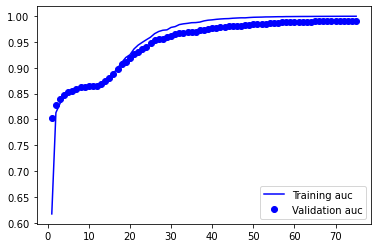

In [16]:
history = hist.history
history
train_loss = history['loss']
val_loss = history['val_loss']

train_acc = history['categorical_accuracy']
val_acc = history['val_categorical_accuracy']

train_prec = history['precision']
val_prec = history['val_precision']

train_rec = history['recall']
val_rec = history['val_recall']

train_auc = history['auc']
val_auc = history['val_auc']

plt.plot(range(1, EPOCHS+1), train_loss, 'b', label='Training loss')
plt.plot(range(1, EPOCHS+1), val_loss, 'bo', label='Validation loss')
plt.legend()
plt.show()

plt.plot(range(1, EPOCHS+1), train_acc, 'b', label='Training acc')
plt.plot(range(1, EPOCHS+1), val_acc, 'bo', label='Validation acc')
plt.legend()
plt.show()

plt.plot(range(1, EPOCHS+1), train_prec, 'b', label='Training prec')
plt.plot(range(1, EPOCHS+1), val_prec, 'bo', label='Validation prec')
plt.legend()
plt.show()

plt.plot(range(1, EPOCHS+1), train_rec, 'b', label='Training recall')
plt.plot(range(1, EPOCHS+1), val_rec, 'bo', label='Validation recall')
plt.legend()
plt.show()

plt.plot(range(1, EPOCHS+1), train_auc, 'b', label='Training auc')
plt.plot(range(1, EPOCHS+1), val_auc, 'bo', label='Validation auc')
plt.legend()
plt.show()

In [17]:
model.evaluate(x_test, y_test)

24/24 [==============================] - 0s 842us/step - loss: 0.2208 - categorical_accuracy: 0.9406 - precision: 0.9684 - recall: 0.9096 - auc: 0.9928


[0.22083722054958344,
 0.9406207799911499,
 0.9683908224105835,
 0.9095816612243652,
 0.9927922487258911]

In [40]:
predictions = model.predict(x_test)
predictions

array([[3.3998060e-01, 9.2579626e-02, 2.3209020e-01, 3.3534950e-01],
       [1.5020274e-01, 2.1151483e-01, 2.1963014e-01, 4.1865224e-01],
       [9.9977142e-01, 1.6834110e-05, 4.1925341e-05, 1.6978630e-04],
       ...,
       [9.9527705e-01, 9.6320536e-04, 1.7869580e-03, 1.9729070e-03],
       [9.9897075e-01, 3.1778829e-05, 2.0894589e-04, 7.8846072e-04],
       [5.0304700e-03, 8.4457524e-02, 8.5707211e-01, 5.3439889e-02]],
      dtype=float32)

In [42]:
# confusion matrix
cm = confusion_matrix(y_true=np.argmax(y_test, axis=1), y_pred=np.argmax(predictions, axis=1))
cm

array([[402,   4,  13,   4],
       [  2,  87,   1,   1],
       [  2,   2, 174,   2],
       [  8,   0,   5,  34]])

In [34]:
# classification report
report = classification_report(y_true=np.argmax(y_test, axis=1), y_pred=predictions)
report

'              precision    recall  f1-score   support\n\n           0       0.97      0.95      0.96       423\n           1       0.94      0.96      0.95        91\n           2       0.90      0.97      0.93       180\n           3       0.83      0.72      0.77        47\n\n    accuracy                           0.94       741\n   macro avg       0.91      0.90      0.90       741\nweighted avg       0.94      0.94      0.94       741\n'

In [35]:
reverse_word_index = dict([(index, word) for (word, index) in word_index.items()])

In [44]:
# display some predictions
for i in range(50):
    pred_label = np.argmax(predictions[i])
    true_label = np.argmax(y_test[i])
    message = ' '.join([reverse_word_index.get(w, '') for w in x_test[i].tolist()])
    confident_level = predictions[i, pred_label] * 100
    
    print('"{}"\n> True label: {}\n> Pred label: {} ({:.2f}%)\n\n'.format(message.strip(), true_label, pred_label, confident_level))

"kami elite reloade pulsa cari agen chip all operator hrg info komfirmasi via"
> True label: 0
> Pred label: 0 (34.00%)


"mau tahu cara dapatkan ribuan database email untuk promosi hanya klik bisa scrape ribuan data sesuai interested audience https bit scraperfb"
> True label: 2
> Pred label: 3 (41.87%)


"info resmi shopee selamat anda resmi dapatkan hadiah juta dri shopee pin info hadiah klik www undian shopee blogspot com"
> True label: 0
> Pred label: 0 (99.98%)


"pesan resmi shopee indonesia menetapkan anda sebagai pemenang cek dengan pin info klik bit gebyarshoope"
> True label: 0
> Pred label: 0 (99.26%)


"pesan terahir shopee anda resmi dapat hadiah cek jata pin aaq code untuk info hadiah klik bit shopee"
> True label: 0
> Pred label: 0 (99.84%)


"anda punya masalah sprti dililit hutang biaya rmh tangga modal usaha dll untuk lebih jelas silhkan klik https bit bsaokv whatsapp"
> True label: 0
> Pred label: 0 (86.07%)


"selamat anda resmi terpilih mendapat cek pin info klik 